In [84]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [108]:
url=f'https://api.openweathermap.org/data/2.5/weather?q='
cit=[]
lat=[]
long=[]
maxtemp=[]
humidity=[]
cloud=[]
ws=[]
country=[]
date=[]
for city in cities:
    query = url + city + f'&appid={weather_api_key}'+'&units=imperial'
    response = requests.get(query)
    response_json = response.json()
    try:
        lat.append(response_json["coord"]["lat"])
        long.append(response_json["coord"]["lon"])
        maxtemp.append(response_json["main"]["temp_max"])
        humidity.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        ws.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        cit.append(response_json['name'])
    except:
        print("City not found Skipping...")
for x in range(len(cit)):
    print(f'Processing {x} | {cit[x]}')

City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
City not found Skipping...
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
city_dict= pd.DataFrame({
    'City': cit,
    'Lat': lat,
    'Lng': long,
    'Max Temp': maxtemp,
    'Humidity': humidity,
    'Cloudiness': cloud,
    'Wind Speed': ws,
    'Country': country,
    'Date': date
})
city_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baker City,44.7749,-117.8344,38.59,87,33,12.82,US,1666544296
1,Tuatapere,-46.1333,167.6833,48.07,96,100,12.95,NZ,1666544296
2,Saint-Pierre,-21.3393,55.4781,73.08,78,20,2.30,RE,1666544297
3,Arraial do Cabo,-22.9661,-42.0278,76.96,73,40,12.66,BR,1666544297
4,Ushuaia,-54.8000,-68.3000,55.06,47,40,4.61,AR,1666544206
...,...,...,...,...,...,...,...,...,...
524,Los Andes,-32.8337,-70.5983,79.02,35,5,8.14,CL,1666544515
525,Paamiut,61.9940,-49.6678,36.36,98,100,12.39,GL,1666544556
526,Barsovo,61.1667,73.1667,30.33,71,49,15.88,RU,1666544557
527,Novoanninskiy,50.5287,42.6747,48.49,81,89,9.60,RU,1666544557


In [110]:
city_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,20.486589,17.311578,61.662476,71.098299,61.211720,8.602628,1.666544e+09
std,33.056674,91.071409,21.306190,20.881832,38.543666,5.927566,1.076899e+02
min,-54.800000,-175.200000,-4.500000,8.000000,0.000000,0.290000,1.666544e+09
25%,-6.884400,-63.598600,47.970000,60.000000,21.000000,4.270000,1.666544e+09
50%,22.075200,24.183300,67.780000,76.000000,75.000000,7.250000,1.666544e+09
75%,48.421900,99.184400,78.750000,87.000000,99.000000,11.500000,1.666544e+09
max,78.218600,179.316700,100.530000,100.000000,100.000000,33.530000,1.666545e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [111]:
cit_cleaned= city_dict[city_dict["Humidity"]<101]
cit_cleaned.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,20.486589,17.311578,61.662476,71.098299,61.211720,8.602628,1.666544e+09
std,33.056674,91.071409,21.306190,20.881832,38.543666,5.927566,1.076899e+02
min,-54.800000,-175.200000,-4.500000,8.000000,0.000000,0.290000,1.666544e+09
25%,-6.884400,-63.598600,47.970000,60.000000,21.000000,4.270000,1.666544e+09
50%,22.075200,24.183300,67.780000,76.000000,75.000000,7.250000,1.666544e+09
75%,48.421900,99.184400,78.750000,87.000000,99.000000,11.500000,1.666544e+09
max,78.218600,179.316700,100.530000,100.000000,100.000000,33.530000,1.666545e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

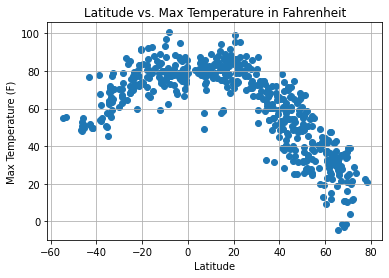

In [112]:
plt.scatter(cit_cleaned["Lat"],cit_cleaned["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. Max Temperature in Fahrenheit")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

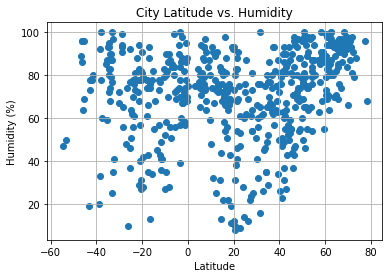

In [113]:
plt.scatter(cit_cleaned["Lat"],cit_cleaned["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

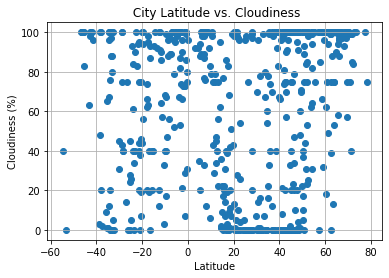

In [114]:
plt.scatter(cit_cleaned["Lat"],cit_cleaned["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(" City Latitude vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

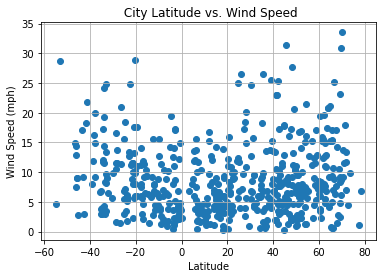

In [115]:
plt.scatter(cit_cleaned["Lat"],cit_cleaned["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(" City Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [116]:
north= cit_cleaned[cit_cleaned["Lat"]>=0]
south= cit_cleaned[cit_cleaned["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87


Text(10, 5, 'y = -1.01x + 96.08')

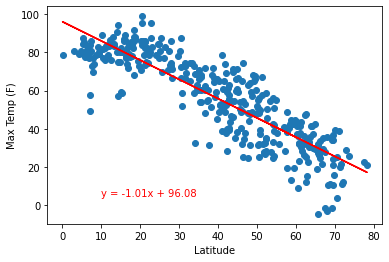

In [118]:
correlation= st.pearsonr(north["Lat"], north["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= north['Lat']
y_values= north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(10,5),fontsize=10,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.69


Text(-20, 50, 'y = 0.57x + 84.6')

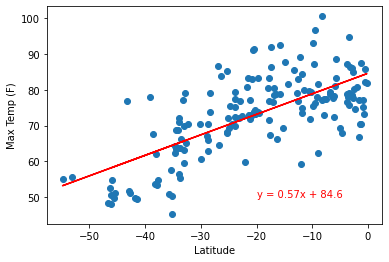

In [121]:
correlation= st.pearsonr(south["Lat"], south["Max Temp"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= south['Lat']
y_values= south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(-20,50),fontsize=10,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.35


Text(50, 20, 'y = 0.37x + 57.0')

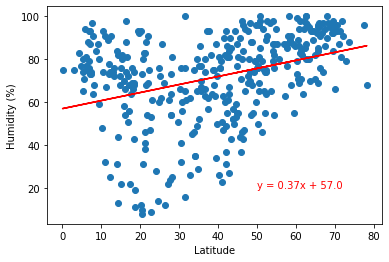

In [123]:
correlation= st.pearsonr(north["Lat"], north["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= north['Lat']
y_values= north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,20),fontsize=10,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


Text(-50, 20, 'y = -0.03x + 69.18')

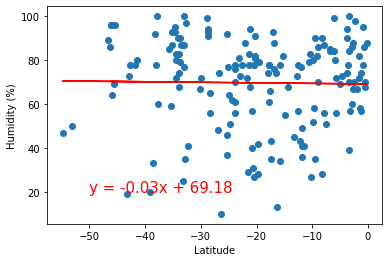

In [126]:
correlation= st.pearsonr(south["Lat"], south["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= south['Lat']
y_values= south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31


Text(50, 30, 'y = 0.63x + 34.91')

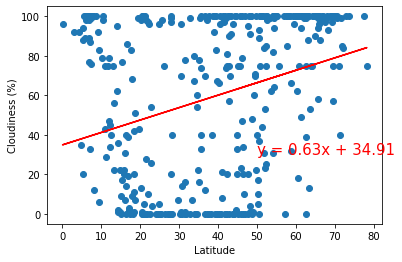

In [129]:
correlation= st.pearsonr(north["Lat"], north["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= north['Lat']
y_values= north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


Text(-50, 20, 'y = 0.37x + 71.86')

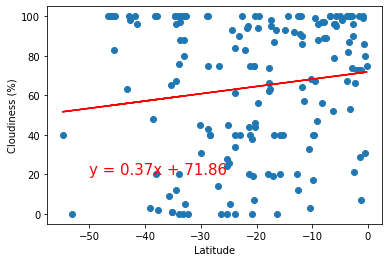

In [132]:
correlation= st.pearsonr(south["Lat"], south["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= south['Lat']
y_values= south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.22


Text(10, 30, 'y = 0.07x + 5.78')

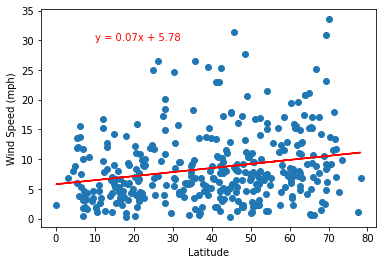

In [134]:
correlation= st.pearsonr(north["Lat"], north["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= north['Lat']
y_values= north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(10,30),fontsize=10,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.32


Text(-50, 25, 'y = -0.14x + 6.09')

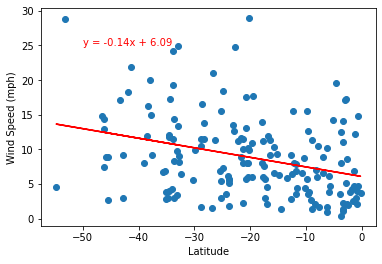

In [136]:
correlation= st.pearsonr(south["Lat"], south["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values= south['Lat']
y_values= south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-50,25),fontsize=10,color="red")

In [139]:
cit_cleaned.to_csv('../city_info.csv',index=False)